In [695]:
import sys
import numpy as np
from numpy.linalg import norm
import pandas as pd

from IPython.display import display
import matplotlib.pyplot as plt

In [696]:
sys.path.append('Тема №8')

%load_ext autoreload
%autoreload 2
from task8 import (Parameters, fix_step, auto_step)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [697]:
c2: float = 1 / 9
a21: float = c2
b1: float = 1 - 1 / (2 * c2)
b2: float = 1 / (2 * c2)

params = Parameters(
    ksi=1 / 9,
    A=2 / 11,
    B=3 / 13,
    eps=1e-4,
    p=1e-5,
    rtol=1e-6,
    pi=np.pi,
    c2=c2,
    a21=a21,
    b1=b1,
    b2=b2,
)

# Посчитаем необходимые коэффициенты
print(f'\nДля двухэтапного метода Рунге-Кутты: \nc2 = {c2}, \na21 = {a21}, \nb1 = {b1}, \nb2 = {b2}')


Для двухэтапного метода Рунге-Кутты: 
c2 = 0.1111111111111111, 
a21 = 0.1111111111111111, 
b1 = -3.5, 
b2 = 4.5


In [698]:
# Начальные данные
x0 = 0.0
x1 = params.pi
y0 = np.array([params.B * params.pi, params.A * params.pi])

### Точное решение поставленной задачи Коши


In [699]:
# Точное решение данной задачи Коши
def y1(x):
    return ((params.B * params.pi * np.cos(x * np.sqrt(params.A * params.B))) +
            (np.sqrt(params.A ** 3 / params.B) * params.pi * np.sin(x * np.sqrt(params.A * params.B))))


def y2(x):
    return (params.A * params.pi * np.cos(x * np.sqrt(params.A * params.B)) -
            np.sqrt((params.B ** 3) / params.A) * params.pi * np.sin(x * np.sqrt(params.A * params.B)))


y_true = np.array([y1(x1), y2(x1)])
print(y_true)

[ 0.88419223 -0.03311322]


### Часть №1. Расчетные схемы метода Рунге-Кутты с постоянным шагом

In [700]:
s_2 = 2
s_3 = 3

In [701]:
# Явный метод Рунге-Кутты 2-го порядка (ЯМРК 2)
fix_step_values_2, fix_step_full_errors_2, fix_step_steps_2, fix_step_calc_count_2 = fix_step(x0, x1, y0, s_2, params)
fix_step_count_2 = np.ceil((x1 - x0) / fix_step_steps_2)

df_fix_2 = pd.DataFrame({
    "Кол-во шагов": fix_step_count_2,
    "Длина шага": fix_step_steps_2,
    "Результаты": fix_step_values_2.tolist(),
    "Полная погрешность": fix_step_full_errors_2,
    "Кол-во подсчётов": fix_step_calc_count_2,
})

print(f"Полученное значение (фиксированный шаг): {fix_step_values_2[-1]}")
print(f"Реальное значение: {y_true}")
print(f'Истинная погрешность: {y_true - fix_step_values_2[-1]}\n')
display(df_fix_2)

Полученное значение (фиксированный шаг): [ 0.88416361 -0.03406955]
Реальное значение: [ 0.88419223 -0.03311322]
Истинная погрешность: [2.86254555e-05 9.56331454e-04]



,Кол-во шагов,Длина шага,Результаты,Полная погрешность,Кол-во подсчётов
0,108.0,0.029268,"[0.8841635878028257, -0.03407026838588262]",9.967011e-04,646
1,215.0,0.014634,"[0.8841636080142373, -0.03406954729866986]",2.404568e-07,1290


In [702]:
# Явный метод Рунге-Кутты 3-го порядка (ЯМРК 3)
fix_step_values_3, fix_step_full_errors_3, fix_step_steps_3, fix_step_calc_count_3 = fix_step(x0, x1, y0, s_3, params)
fix_step_count_3 = np.ceil((x1 - x0) / fix_step_steps_3)

df_fix_3 = pd.DataFrame({
    "Кол-во шагов": fix_step_count_3,
    "Длина шага": fix_step_steps_3,
    "Результаты": fix_step_values_3.tolist(),
    "Полная погрешность": fix_step_full_errors_3,
    "Кол-во подсчётов": fix_step_calc_count_3,
})

print(f"Полученное значение (фиксированный шаг): {fix_step_values_3[-1]}")
print(f"Реальное значение: {y_true}")
print(f'Истинная погрешность: {y_true - fix_step_values_3[-1]}\n')
display(df_fix_3)

Полученное значение (фиксированный шаг): [ 0.88401832 -0.0385583 ]
Реальное значение: [ 0.88419223 -0.03311322]
Истинная погрешность: [0.00017391 0.00544508]



,Кол-во шагов,Длина шага,Результаты,Полная погрешность,Кол-во подсчётов
0,33.0,0.096009,"[0.8840183199510327, -0.03855829873037646]",2.274554e-08,297


### Часть №2. Расчетные схемы метода Рунге-Кутты с автоматическим выбором шага

In [703]:
auto_step_values_2, auto_step_local_errors_2, auto_step_steps_2, auto_step_calc_count_2 = auto_step(x0, x1, y0, s_2, params)

df_auto_2 = pd.DataFrame({
    "Кол-во шагов": np.ones(len(auto_step_steps_2)),
    "Длина шага": auto_step_steps_2,
    "Результаты": auto_step_values_2.tolist(),
    "Локальная погрешность": auto_step_local_errors_2,
    "Кол-во подсчётов": auto_step_calc_count_2,
})

print(f"Полученное значение (фиксированный шаг): {auto_step_values_2[-1]}")
print(f"Реальное значение: {y_true}")
print(f'Истинная погрешность: {y_true - auto_step_values_2[-1]}\n')
display(df_auto_2)

Полученное значение (фиксированный шаг): [ 0.88419154 -0.03316235]
Реальное значение: [ 0.88419223 -0.03311322]
Истинная погрешность: [6.93281867e-07 4.91379572e-05]



,Кол-во шагов,Длина шага,Результаты,Локальная погрешность,Кол-во подсчётов
0,1.0,0.029268,"[0.7280094689108562, 0.5662918024589599]",3.452613e-08,6
1,1.0,0.029268,"[0.731009851993432, 0.5613645872366586]",3.454823e-08,6
2,1.0,0.058535,"[0.7369317975713475, 0.5514496280731702]",2.765838e-07,6
3,1.0,0.117071,"[0.7484578466026341, 0.5313818667989908]",2.215813e-06,6
4,1.0,0.058535,"[0.7540594378106082, 0.5212333723505433]",2.776175e-07,6
5,1.0,0.117071,"[0.7649373908660866, 0.5007115729186947]",2.223970e-06,6
6,1.0,0.029268,"[0.7675881316226877, 0.49553612184895596]",3.482397e-08,6
7,1.0,0.029268,"[0.7702112840925995, 0.4903428604539421]",3.484420e-08,6
8,1.0,0.058535,"[0.7753745415799206, 0.47990346680929447]",2.789344e-07,6
9,1.0,0.058535,"[0.7804263235171499, 0.46939507740232483]",2.792516e-07,6


In [704]:
auto_step_values_3, auto_step_local_errors_3, auto_step_steps_3, auto_step_calc_count_3 = auto_step(x0, x1, y0, s_3, params)

df_auto_3 = pd.DataFrame({
    "Кол-во шагов": np.ones(len(auto_step_steps_3)),
    "Длина шага": auto_step_steps_3,
    "Результаты": auto_step_values_3.tolist(),
    "Локальная погрешность": auto_step_local_errors_3,
    "Кол-во подсчётов": auto_step_calc_count_3,
})

print(f"Полученное значение (фиксированный шаг): {auto_step_values_3[-1]}")
print(f"Реальное значение: {y_true}")
print(f'Истинная погрешность: {y_true - auto_step_values_3[-1]}\n')
display(df_auto_3)

Полученное значение (фиксированный шаг): [ 0.8841877  -0.03311336]
Реальное значение: [ 0.88419223 -0.03311322]
Истинная погрешность: [4.53027429e-06 1.39527071e-07]



,Кол-во шагов,Длина шага,Результаты,Локальная погрешность,Кол-во подсчётов
0,1.0,0.096009,"[0.7348129797232704, 0.5550266583404456]",5.750458e-09,9
1,1.0,0.096009,"[0.7443588566269742, 0.5386400007782968]",5.737424e-09,9
2,1.0,0.192017,"[0.7625833411737031, 0.505248114400031]",9.156386e-08,9
3,1.0,0.384034,"[0.7954661336174825, 0.43617195183120105]",1.457715e-06,9
4,1.0,0.192017,"[0.8100746249490921, 0.400595262842938]",9.041392e-08,9
5,1.0,0.384034,"[0.8355106943281149, 0.32763840856690335]",1.440340e-06,9
6,1.0,0.384034,"[0.855779150830376, 0.2526553829667796]",1.430590e-06,9
7,1.0,0.048004,"[0.8579429313137542, 0.24316308067836068]",3.475425e-10,9
8,1.0,0.048004,"[0.8600237592671184, 0.23364726751846315]",3.473254e-10,9
9,1.0,0.048004,"[0.8620214335000652, 0.22410886354918863]",3.471163e-10,9


### Часть №3. Анализ эффективности методов Рунге-Кутты

In [705]:
# # Строим графики
# plt.figure(figsize=(16, 6))
# plt.title('Зависимость полной погрешности от x')
#
# x = []
# errors = []
# for j, step in enumerate(fix_step_steps_2):
#     for count in fix_step_count_2:
#         for i in range(int(count)):
#             errors.append(norm(fix_step_values_2[j] - y_true))
#             x.append(x0 + (i+1)*step)
#
# print(x, errors)
#
# plt.plot(x, errors, marker='o', label="Метод Рунге-Кутты 2")
# # plt.plot(x0 + np.cumsum(fix_step_steps_3), norm(fix_step_values_3 - y_true, axis=1), marker='o', label="Метод Рунге-Кутты 3")
# plt.grid()
# plt.legend();

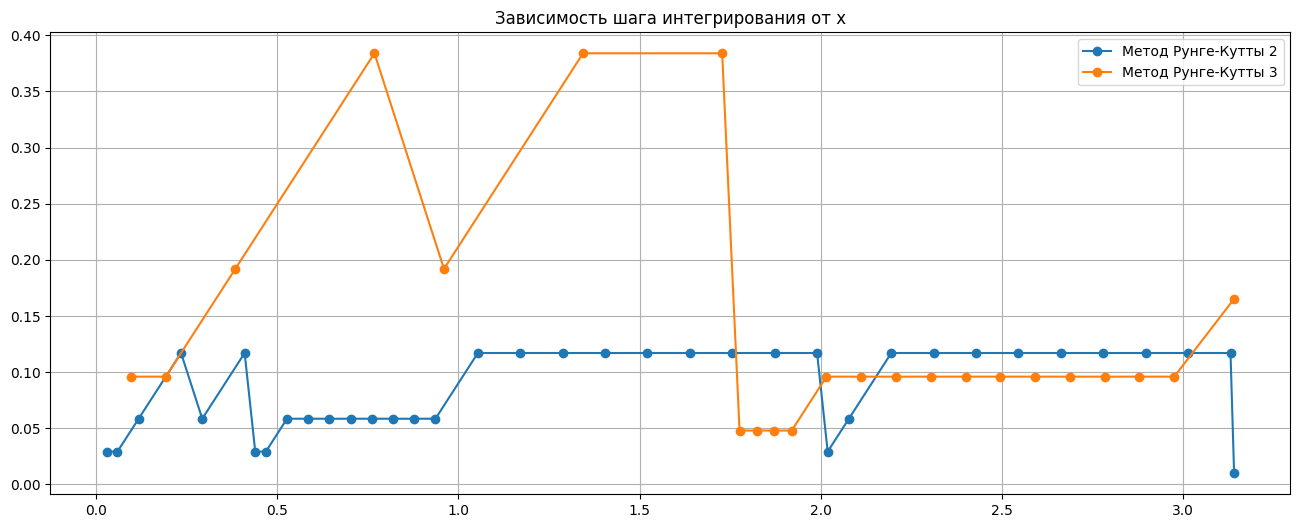

In [706]:
# Строим графики
plt.figure(figsize=(16, 6))
plt.title('Зависимость шага интегрирования от x')
plt.plot(x0 + np.cumsum(auto_step_steps_2), auto_step_steps_2, marker='o', label="Метод Рунге-Кутты 2")
plt.plot(x0 + np.cumsum(auto_step_steps_3), auto_step_steps_3, marker='o', label="Метод Рунге-Кутты 3")
plt.grid()
plt.legend();

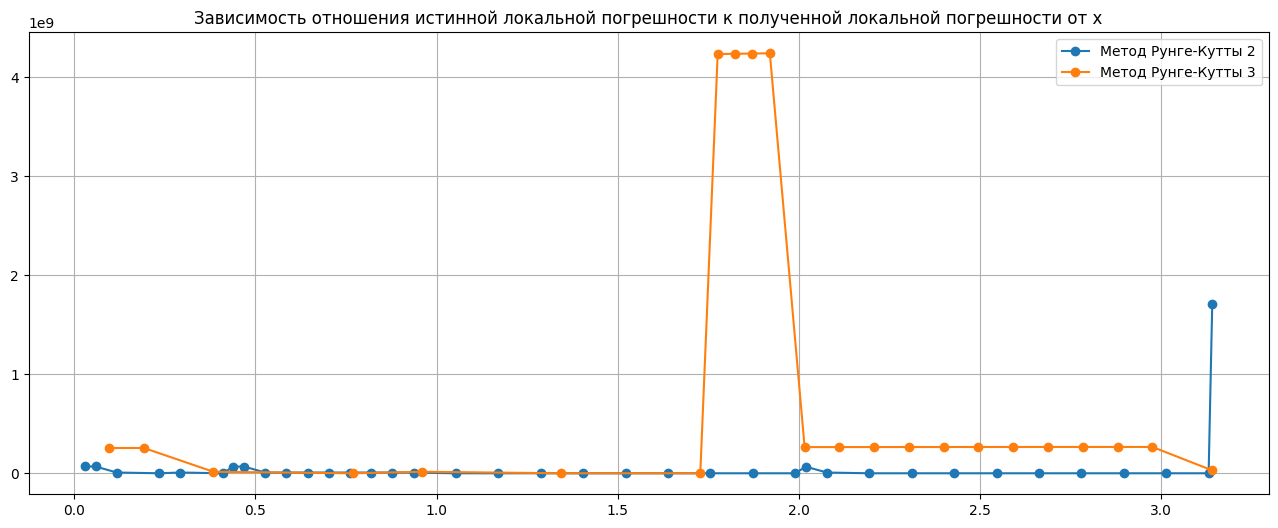

In [707]:
# Явный метод Рунге-Кутты 2-го порядка (ЯМРК 2)
args_2 = x0 + np.cumsum(auto_step_steps_2)  # Точки x, в которых считали ДУ
real_loc_error_2 = norm(auto_step_values_2 - y_true)
ksi_2 = real_loc_error_2 / auto_step_local_errors_2

# Явный метод Рунге-Кутты 3-го порядка (ЯМРК 3)
args_3 = x0 + np.cumsum(auto_step_steps_3)  # Точки x, в которых считали ДУ
real_loc_error_3 =  norm(auto_step_values_3 - y_true)
ksi_3 = real_loc_error_3 / auto_step_local_errors_3

# Построение графиков
plt.figure(figsize=(16, 6))
plt.title('Зависимость отношения истинной локальной погрешности к полученной локальной погрешности от x')
plt.plot(args_2, ksi_2, marker='o', label="Метод Рунге-Кутты 2")
plt.plot(args_3, ksi_3, marker='o', label="Метод Рунге-Кутты 3")
plt.grid()
plt.legend();

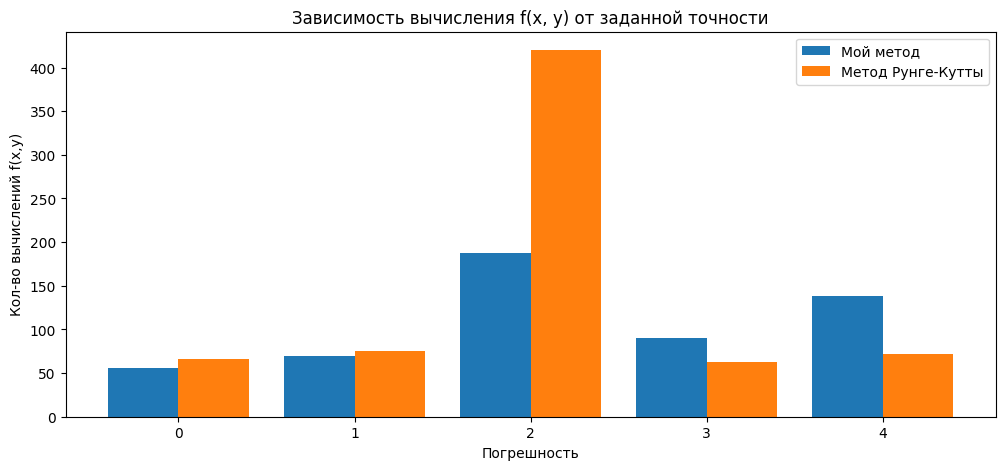

In [708]:
p_list = [10e-1, 10e-2, 10e-3, 10e-4, 10e-5]

calc_list_2 = []
calc_list_3 = []
for p in p_list:
    params.p = p
    calc_list_2.append(np.sum(auto_step(x0, x1, y0, s_2, params)[3]))
    calc_list_3.append(np.sum(auto_step(x0, x1, y0, s_3, params)[3]))

# Построение графиков
plt.figure(figsize=(12, 5))
plt.title('Зависимость вычисления f(x, y) от заданной точности')
plt.bar(-np.log10(p_list) - 0.2, calc_list_2, width=0.4, label='Мой метод')
plt.bar(-np.log10(p_list) + 0.2, calc_list_3, width=0.4, label='Метод Рунге-Кутты')
plt.xlabel('Погрешность')
plt.ylabel('Кол-во вычислений f(x,y)')
plt.legend();